# SVM

SVMs are the most popular algorithm for classification in machine learning algorithms. Their mathematical background is quintessential in building the foundational block for the geometrical distinction between the two classes.


Support Vector Machines are a type of supervised machine learning algorithm that provides analysis of data for classification and regression analysis. While they can be used for regression, SVM is mostly used for classification. We carry out plotting in the n-dimensional space. Value of each feature is also the value of the specific coordinate. Then, we find the ideal hyperplane that differentiates between the two classes.


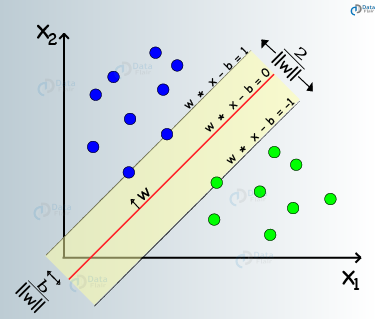

The basic principle behind the working of Support vector machines is simple – Create a hyperplane that separates the dataset into classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
voice = pd.read_csv(r"D:\msc3\machine learning\lab9/voice.csv")

In [3]:
voice.shape

(3168, 21)

In [4]:
voice .head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
print("Number of data:"+str(len(voice .index)))

Number of data:3168


In [6]:
voice .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [7]:
voice.isnull().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

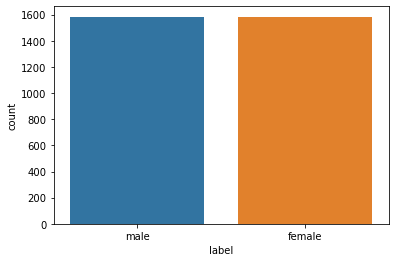

In [8]:
sns.countplot(x="label", data=voice)

In [9]:
print("Total number of labels: {}".format(voice.shape[0]))
print("Number of male: {}".format(voice[voice.label == 'male'].shape[0]))
print("Number of female: {}".format(voice[voice.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001849F9B6488>,
      dtype=object)

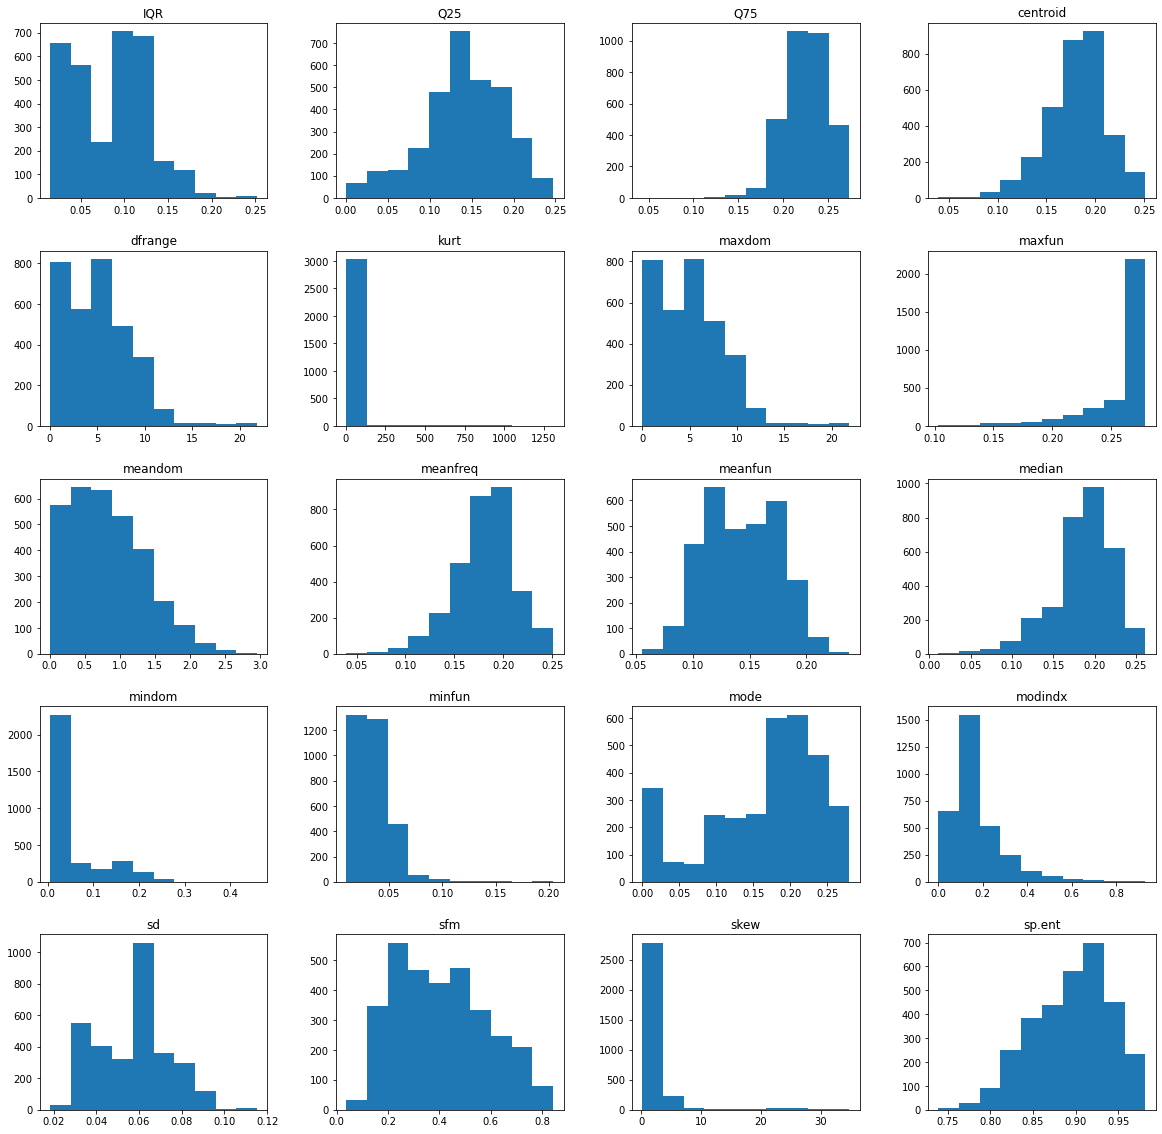

In [10]:
voice .hist(bins=10,figsize=(20,20),grid=False)

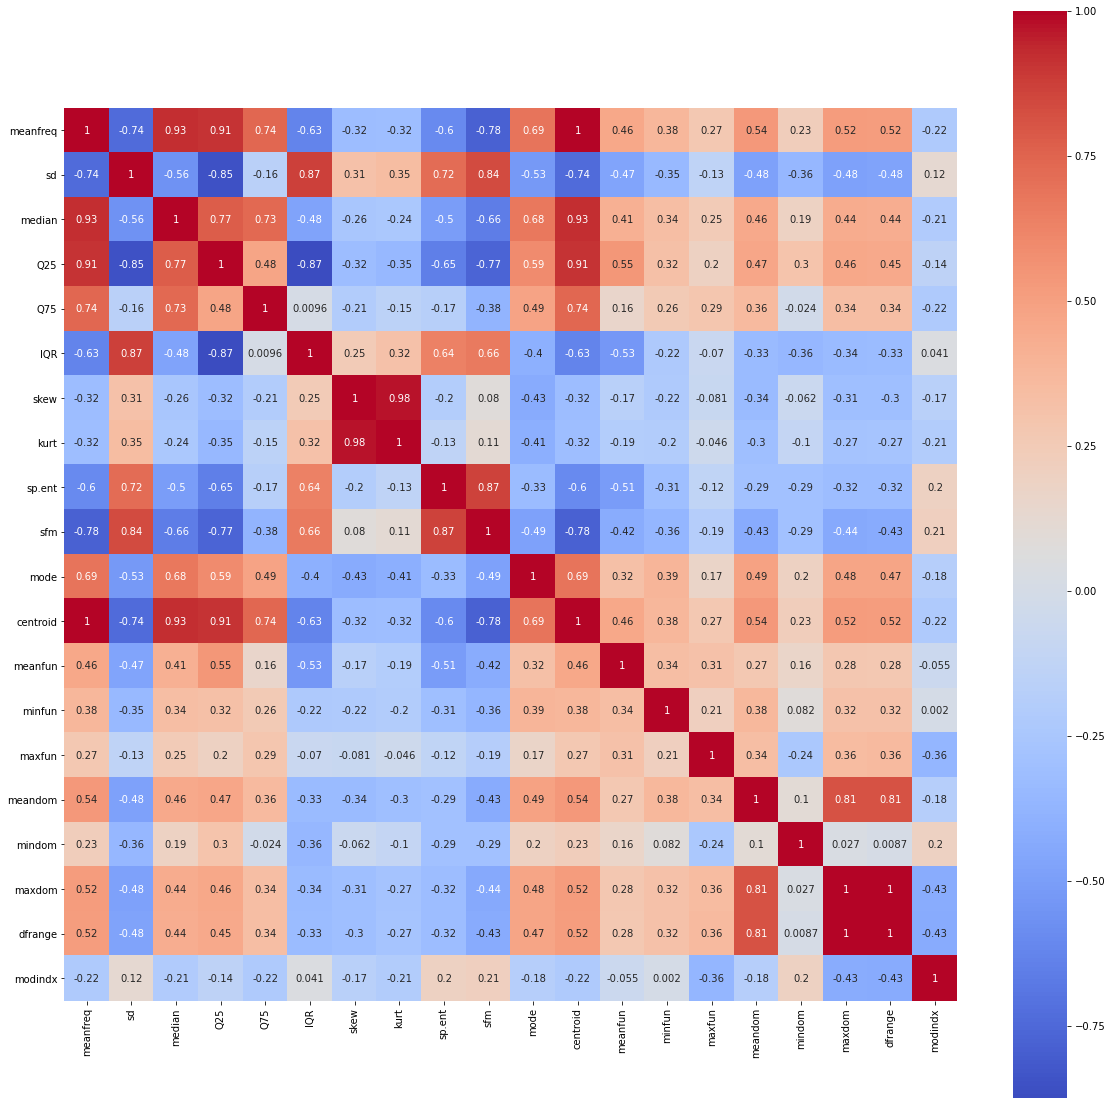

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(voice[voice.columns].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [12]:
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [13]:
voice['meanfreq'] = (voice['meanfreq'] - voice['meanfreq'].min()) / (voice['meanfreq'].max() - voice['meanfreq'].min())
voice['sd'] = (voice['sd'] - voice['sd'].min()) / (voice['sd'].max() - voice['sd'].min())
voice['median'] = (voice['median'] - voice['median'].min()) / (voice['median'].max() - voice['median'].min())
voice['Q25'] = (voice['Q25'] - voice['Q25'].min()) / (voice['Q25'].max() - voice['Q25'].min())
voice['Q75'] = (voice['Q75'] - voice['Q75'].min()) / (voice['Q75'].max() - voice['Q75'].min())
voice['IQR'] = (voice['IQR'] - voice['IQR'].min()) / (voice['IQR'].max() - voice['IQR'].min())
voice['skew'] = (voice['skew'] - voice['skew'].min()) / (voice['skew'].max() - voice['skew'].min())
voice['kurt'] = (voice['kurt'] - voice['kurt'].min()) / (voice['kurt'].max() - voice['kurt'].min())
voice['sp.ent'] = (voice['sp.ent'] - voice['sp.ent'].min()) / (voice['sp.ent'].max() - voice['sp.ent'].min())
voice['sfm'] = (voice['sfm'] - voice['sfm'].min()) / (voice['sfm'].max() - voice['sfm'].min())
voice['mode'] = (voice['mode'] - voice['mode'].min()) / (voice['mode'].max() - voice['mode'].min())
voice['centroid'] = (voice['centroid'] - voice['centroid'].min()) / (voice['centroid'].max() - voice['centroid'].min())
voice['meanfun'] = (voice['meanfun'] - voice['meanfun'].min()) / (voice['meanfun'].max() - voice['meanfun'].min())
voice['minfun'] = (voice['minfun'] - voice['minfun'].min()) / (voice['minfun'].max() - voice['minfun'].min())
voice['maxfun'] = (voice['maxfun'] - voice['maxfun'].min()) / (voice['maxfun'].max() - voice['maxfun'].min())
voice['meandom'] = (voice['meandom'] - voice['meandom'].min()) / (voice['meandom'].max() - voice['meandom'].min())
voice['mindom'] = (voice['mindom'] - voice['mindom'].min()) / (voice['mindom'].max() - voice['mindom'].min())
voice['maxdom'] = (voice['maxdom'] - voice['maxdom'].min()) / (voice['maxdom'].max() - voice['maxdom'].min())
voice['dfrange'] = (voice['dfrange'] - voice['dfrange'].min()) / (voice['dfrange'].max() - voice['dfrange'].min())
voice['modindx'] = (voice['modindx'] - voice['modindx'].min()) / (voice['modindx'].max() - voice['modindx'].min())

In [14]:
X=voice.drop("label",axis=1)
y=voice["label"]

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','effect_score']  #naming the dataframe columns
print(featureScores.nlargest(10,'effect_score'))  #print 10 best features

   features  effect_score
12  meanfun    144.696749
5       IQR    133.946160
3       Q25     56.653044
1        sd     53.759899
9       sfm     42.614555
8    sp.ent     40.492573
16   mindom     22.240548
17   maxdom     13.645437
18  dfrange     13.288562
15  meandom     13.161948


In [16]:
from sklearn.preprocessing import LabelEncoder
y=voice.iloc[:,-1]

# Encode label category
# male -> 1
# female -> 0

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [18]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(X,y,test_size=0.3, random_state=2)

# Running SVM with default hyperparameter

# Kernel

Kernel in the SVM is responsible for transforming the input data into the required format. Some of the kernels used in SVM are linear, polynomial and radial basis function (RBF). For creating a non-linear hyperplane, we use RBF and Polynomial function. For complex applications, one should use more advanced kernels to separate classes that are nonlinear in nature. With this transformation, one can obtain accurate classifiers.

# Regularization 

We can maintain regularization by adjusting it in the Scikit-learn’s C parameters. C denotes a penalty parameter representing an error or any form of misclassification. With this misclassification, one can understand how much of the error is actually bearable. Through this, you can nullify the compensation between the misclassified term and the decision boundary. With a smaller C value, we obtain hyperplane of small margin and with a larger C value, we obtain hyperplane of larger value.

# Gamma

With a lower value of Gamma will create a loose fit of the training dataset. On the contrary, a high value of gamma will allow the model to get fit more appropriately. A low value of gamma only provides consideration to the nearby points for the calculation of a separate plane whereas the high value of gamma will consider all the data-points to calculate the final separation line.

In [19]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(kernel='rbf') #Default hyperparameters
svc.fit(A_train,b_train)
b_pred=svc.predict(A_test)
print('Accuracy Score for default hyperparameter:')
print(metrics.accuracy_score(b_test,b_pred))

Accuracy Score for default hyperparameter:
0.9768664563617245


In [20]:
from sklearn.metrics import confusion_matrix
C_parameter = [100, 1000, 10000]
for i in range(3):
    svc=SVC(kernel='rbf',C = C_parameter[i])
    svc.fit(A_train,b_train)
    b_pred=svc.predict(A_test)
    cm = confusion_matrix(b_test, b_pred)
# plot_confusion_matrix(svc, X_test, y_test, display_labels=wine['quality'])
    print('Model accuracy score with hyperparameters : {0:0.4f}'. format(metrics.accuracy_score(b_test,b_pred)))
    print(cm)


Model accuracy score with hyperparameters : 0.9769
[[498  13]
 [  9 431]]
Model accuracy score with hyperparameters : 0.9769
[[498  13]
 [  9 431]]
Model accuracy score with hyperparameters : 0.9769
[[498  13]
 [  9 431]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


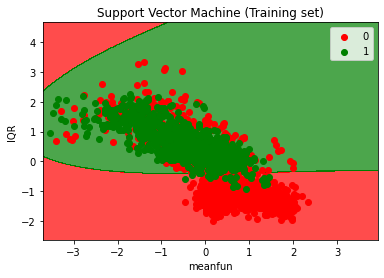

In [21]:
from matplotlib.colors import ListedColormap
X_set, Y_set = A_train, b_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 12].min() - 1, stop = X_set[:, 12].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 5].min() - 1, stop = X_set[:, 5].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(18)]).T
# Xpred now has a grid for x1 and x2 and average value (0) for x3 through x13
pred = svc.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.7, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('meanfun')
plt.ylabel('IQR')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


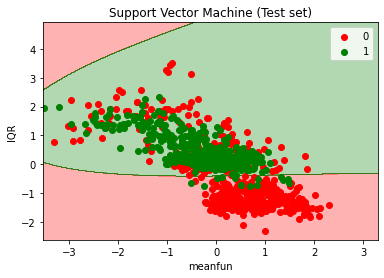

In [22]:
from matplotlib.colors import ListedColormap
X_set, Y_set = A_test, b_test
X1, X2 = np.meshgrid(np.arange(start = A_test[:, 12].min() - 1, stop = A_test[:, 12].max() + 1, step = 0.01),
                     np.arange(start = A_test[:, 5].min() - 1, stop = A_test[:, 5].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(18)]).T
# Xpred now has a grid for x1 and x2 and average value (0) for x3 through x13
pred = svc.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(b_test)):
    plt.scatter(A_test[b_test == j, 0], A_test[b_test == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('meanfun')
plt.ylabel('IQR')
plt.legend()
plt.show()

# Default Linear kernel

In [23]:
svcl=SVC(kernel='linear')
svcl.fit(A_train,b_train)
b_pred=svcl.predict(A_test)
print('Accuracy Score:')
print(metrics.accuracy_score(b_test,b_pred))

Accuracy Score:
0.9726603575184016


In [24]:
from sklearn.metrics import confusion_matrix
C_parameter = [100, 1000, 10000]
for i in range(3):
    svcl=SVC(kernel='linear',C = C_parameter[i])
    svcl.fit(A_train,b_train)
    b_pred=svcl.predict(A_test)
    cm = confusion_matrix(b_test, b_pred)
# plot_confusion_matrix(svc, X_test, y_test, display_labels=wine['quality'])
    print('Model accuracy score with hyperparameters : {0:0.4f}'. format(metrics.accuracy_score(b_test,b_pred)))
    print(cm)


Model accuracy score with hyperparameters : 0.9716
[[495  16]
 [ 11 429]]
Model accuracy score with hyperparameters : 0.9716
[[495  16]
 [ 11 429]]
Model accuracy score with hyperparameters : 0.9716
[[495  16]
 [ 11 429]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


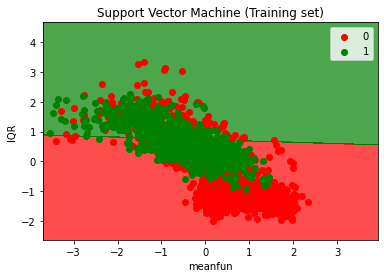

In [25]:
from matplotlib.colors import ListedColormap
X_set, Y_set = A_train, b_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 12].min() - 1, stop = X_set[:, 12].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 5].min() - 1, stop = X_set[:, 5].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(18)]).T
# Xpred now has a grid for x1 and x2 and average value (0) for x3 through x13
pred = svcl.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.7, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('meanfun')
plt.ylabel('IQR')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


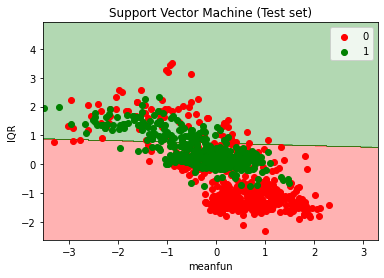

In [26]:
from matplotlib.colors import ListedColormap
X_set, Y_set = A_test, b_test
X1, X2 = np.meshgrid(np.arange(start = A_test[:, 12].min() - 1, stop = A_test[:, 12].max() + 1, step = 0.01),
                     np.arange(start = A_test[:, 5].min() - 1, stop = A_test[:, 5].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(18)]).T
# Xpred now has a grid for x1 and x2 and average value (0) for x3 through x13
pred = svcl.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(b_test)):
    plt.scatter(A_test[b_test == j, 0], A_test[b_test== j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('meanfun')
plt.ylabel('IQR')
plt.legend()
plt.show()

In [27]:
svcp=SVC(kernel='poly')
svcp.fit(A_train,b_train)
b_pred=svcp.predict(A_test)
print('Accuracy Score:')
print(metrics.accuracy_score(b_test,b_pred))

Accuracy Score:
0.9526813880126183


In [28]:
from sklearn.metrics import confusion_matrix
C_parameter = [100, 1000, 10000]
for i in range(3):
    svcp=SVC(kernel='poly',C = C_parameter[i])
    svcp.fit(A_train,b_train)
    b_pred=svcp.predict(A_test)
    cm = confusion_matrix(b_test, b_pred)
# plot_confusion_matrix(svc, X_test, y_test, display_labels=wine['quality'])
    print('Model accuracy score with hyperparameters : {0:0.4f}'. format(metrics.accuracy_score(b_test,b_pred)))
    print(cm)

Model accuracy score with hyperparameters : 0.9706
[[493  18]
 [ 10 430]]
Model accuracy score with hyperparameters : 0.9674
[[493  18]
 [ 13 427]]
Model accuracy score with hyperparameters : 0.9674
[[493  18]
 [ 13 427]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


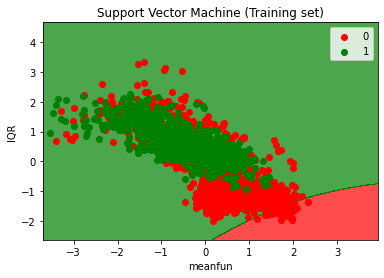

In [29]:
from matplotlib.colors import ListedColormap
X_set, Y_set = A_train, b_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 12].min() - 1, stop = X_set[:, 12].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 5].min() - 1, stop = X_set[:, 5].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(18)]).T
# Xpred now has a grid for x1 and x2 and average value (0) for x3 through x13
pred = svcp.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.7, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('meanfun')
plt.ylabel('IQR')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


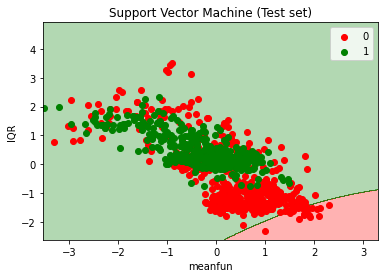

In [30]:
from matplotlib.colors import ListedColormap
X_set, Y_set = A_test, b_test
X1, X2 = np.meshgrid(np.arange(start = A_test[:, 12].min() - 1, stop = A_test[:, 12].max() + 1, step = 0.01),
                     np.arange(start = A_test[:, 5].min() - 1, stop = A_test[:, 5].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(18)]).T
# Xpred now has a grid for x1 and x2 and average value (0) for x3 through x13
pred = svcp.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(b_test)):
    plt.scatter(A_test[b_test == j, 0], A_test[b_test == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('meanfun')
plt.ylabel('IQR')
plt.legend()
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [32]:
# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=aut
svc=SVC()

In [33]:
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001,0.01,0.1,1,10,100,1000], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001,0.01,0.1,1,10,100,1000], 'kernel': ['poly']}
 ]


In [34]:
grid_search = GridSearchCV(estimator = svc,
param_grid = parameters,
scoring = 'accuracy',
cv = 8,
verbose=0)

In [35]:
grid_search.fit(A_train, b_train)

GridSearchCV(cv=8, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [36]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9820


Parameters that give the best results : 

 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=100, gamma=0.1)


In [38]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(A_test, b_test)))

GridSearch CV score on test set: 0.9769


# Linear Discriminant Analysis effects on SVM

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])
print(X.shape)
print(X_lda.shape)

Original number of features: 20
Reduced number of features: 1
(3168, 20)
(3168, 1)


In [40]:
import time
X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_lda, y, 
                                                                        test_size = 0.30, 
                                                                        random_state = 101)

start = time.process_time()
lda = LinearDiscriminantAnalysis().fit(X_Reduced,Y_Reduced)
print('time taken:')
print(time.process_time() - start)

time taken:
0.0


In [41]:
predictionlda = lda.predict(X_Test_Reduced)
print('confusion matrix:')
print(confusion_matrix(Y_Test_Reduced,predictionlda))

confusion matrix:
[[442  21]
 [ 11 477]]


In [42]:
svc=SVC(kernel='rbf') #Default hyperparameters
svc.fit(X_Reduced,Y_Reduced)
Y_pred=svc.predict(X_Test_Reduced)
print('Accuracy Score for default hyperparameter:')
print(metrics.accuracy_score(Y_Test_Reduced,Y_pred))

Accuracy Score for default hyperparameter:
0.9716088328075709


In [43]:
from sklearn.metrics import confusion_matrix
C_parameter = [100, 1000, 10000]
for i in range(3):
    svc=SVC(kernel='rbf',C = C_parameter[i])
    svc.fit(X_Reduced,Y_Reduced)
    Y_pred=svc.predict(X_Test_Reduced)
    cm = confusion_matrix(Y_Test_Reduced, Y_pred)
# plot_confusion_matrix(svc, X_test, y_test, display_labels=wine['quality'])
    print('Model accuracy score with hyperparameters : {0:0.4f}'. format(metrics.accuracy_score(Y_Test_Reduced,Y_pred)))
    print(cm)

Model accuracy score with hyperparameters : 0.9706
[[449  14]
 [ 14 474]]
Model accuracy score with hyperparameters : 0.9706
[[449  14]
 [ 14 474]]
Model accuracy score with hyperparameters : 0.9706
[[449  14]
 [ 14 474]]


In [44]:
svcl=SVC(kernel='linear')
svcl.fit(X_Reduced,Y_Reduced)
Y_pred=svcl.predict(X_Test_Reduced)
print('Accuracy Score:')
print(metrics.accuracy_score(Y_Test_Reduced, Y_pred))

Accuracy Score:
0.9705573080967402


In [45]:
from sklearn.metrics import confusion_matrix
C_parameter = [100, 1000, 10000]
for i in range(3):
    svcl=SVC(kernel='linear',C = C_parameter[i])
    svcl.fit(X_Reduced,Y_Reduced)
    Y_pred=svcl.predict(X_Test_Reduced)
    cm = confusion_matrix(Y_Test_Reduced, Y_pred)
# plot_confusion_matrix(svc, X_test, y_test, display_labels=wine['quality'])
    print('Model accuracy score with hyperparameters : {0:0.4f}'. format(metrics.accuracy_score(Y_Test_Reduced, Y_pred)))
    print(cm)

Model accuracy score with hyperparameters : 0.9706
[[449  14]
 [ 14 474]]
Model accuracy score with hyperparameters : 0.9706
[[449  14]
 [ 14 474]]
Model accuracy score with hyperparameters : 0.9706
[[449  14]
 [ 14 474]]


In [46]:
svcp=SVC(kernel='poly')
svcp.fit(X_Reduced,Y_Reduced)
Y_pred=svcp.predict(X_Test_Reduced)
print('Accuracy Score:')
print(metrics.accuracy_score(Y_Test_Reduced, Y_pred))

Accuracy Score:
0.9495268138801262


In [47]:
from sklearn.metrics import confusion_matrix
C_parameter = [100, 1000, 10000]
for i in range(3):
    svcp=SVC(kernel='linear',C = C_parameter[i])
    svcp.fit(X_Reduced,Y_Reduced)
    Y_pred=svcp.predict(X_Test_Reduced)
    cm = confusion_matrix(Y_Test_Reduced, Y_pred)
# plot_confusion_matrix(svc, X_test, y_test, display_labels=wine['quality'])
    print('Model accuracy score with hyperparameters : {0:0.4f}'. format(metrics.accuracy_score(Y_Test_Reduced, Y_pred)))
    print(cm)

Model accuracy score with hyperparameters : 0.9706
[[449  14]
 [ 14 474]]
Model accuracy score with hyperparameters : 0.9706
[[449  14]
 [ 14 474]]
Model accuracy score with hyperparameters : 0.9706
[[449  14]
 [ 14 474]]


In [48]:
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001,0.01,0.1,1,10,100,1000], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001,0.01,0.1,1,10,100,1000], 'kernel': ['poly']}
 ]


In [49]:
grid_search = GridSearchCV(estimator = svc,
param_grid = parameters,
scoring = 'accuracy',
cv = 8,
verbose=0)

In [ ]:
grid_search.fit(X_Reduced,Y_Reduced)

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))